# 1. Introduction
---

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [97]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


# Start coding here!
df = pd.read_csv("data/nobel.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

## 2. Gender and Birth Country Analysis
---

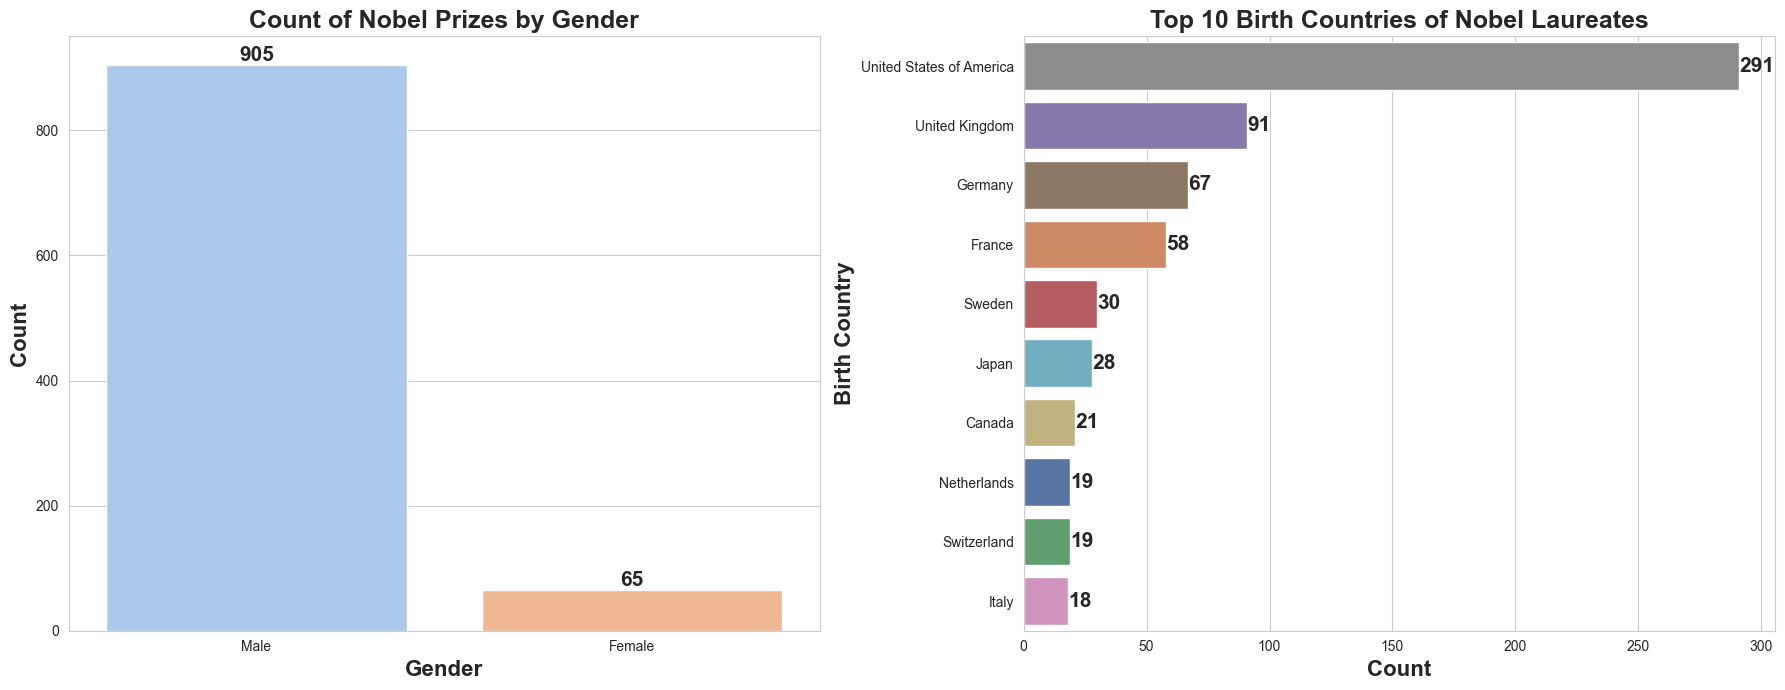

In [136]:
# Gender and Birth Country Analysis (Presentation Style, High Quality)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
palette_gender = sns.color_palette('pastel', n_colors=df['sex'].nunique())
palette_country = sns.color_palette('deep', n_colors=df[df['birth_country'].isin(df['birth_country'].value_counts().nlargest(10).index)]['birth_country'].nunique())
# Gender countplot
ax_gender = sns.countplot(x='sex', data=df, ax=axes[0], palette=palette_gender, hue = "sex", legend=False)
axes[0].set_title('Count of Nobel Prizes by Gender', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Gender', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=16, fontweight='bold')
for container in ax_gender.containers:
    ax_gender.bar_label(container, fontsize=15, fontweight='bold')
# Birth country countplot (top 10)
top_countries = df['birth_country'].value_counts().nlargest(10).index
ax_country = sns.countplot(y='birth_country', data=df[df['birth_country'].isin(top_countries)], ax=axes[1], order=top_countries, palette=palette_country, hue="birth_country", legend=False)
axes[1].set_title('Top 10 Birth Countries of Nobel Laureates', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Count', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Birth Country', fontsize=16, fontweight='bold')
for container in ax_country.containers:
    ax_country.bar_label(container, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('plots/gender_birth_country_analysis.png', bbox_inches='tight', dpi=300)
plt.show()

## 3. US-born Laureates by Decade
---

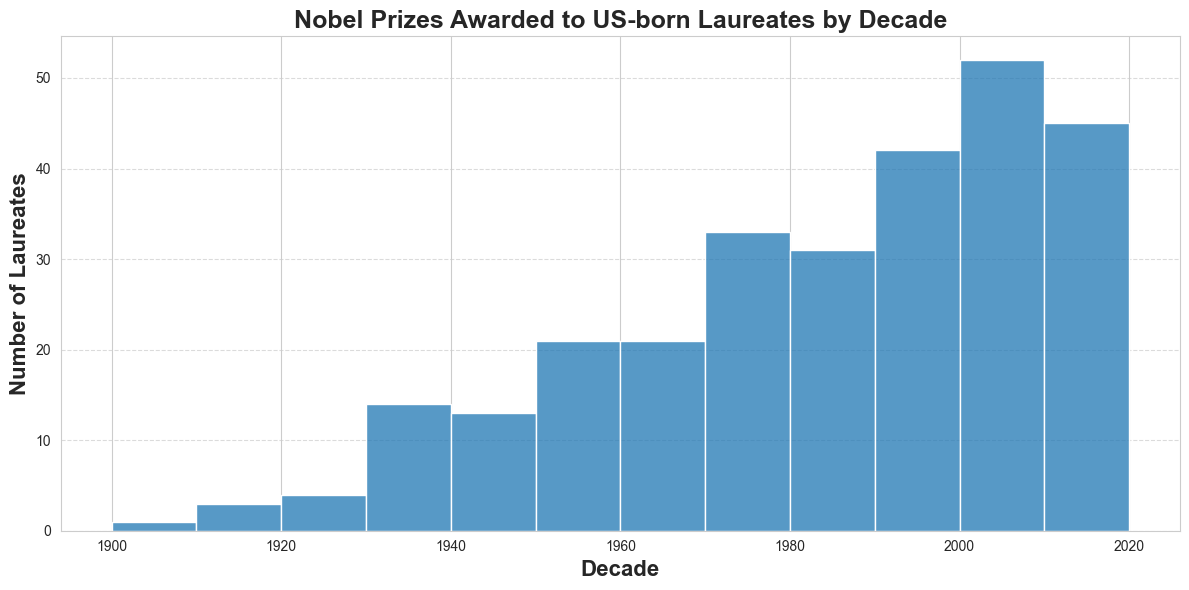

In [135]:
# US-born Laureates by Decade (Presentation Style, High Quality)
usa_winners = df[df['birth_country'] == 'United States of America']
plt.figure(figsize=(12, 6))
ax = sns.histplot(x = "year", data = usa_winners, bins=range(1900, 2030, 10))
plt.title('Nobel Prizes Awarded to US-born Laureates by Decade', fontsize=18, fontweight='bold')
plt.xlabel('Decade', fontsize=16, fontweight='bold')
plt.ylabel('Number of Laureates', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('plots/us_laureates_decade.png', bbox_inches='tight', dpi=300)
plt.show()

## 4. Female Laureates Analysis
---

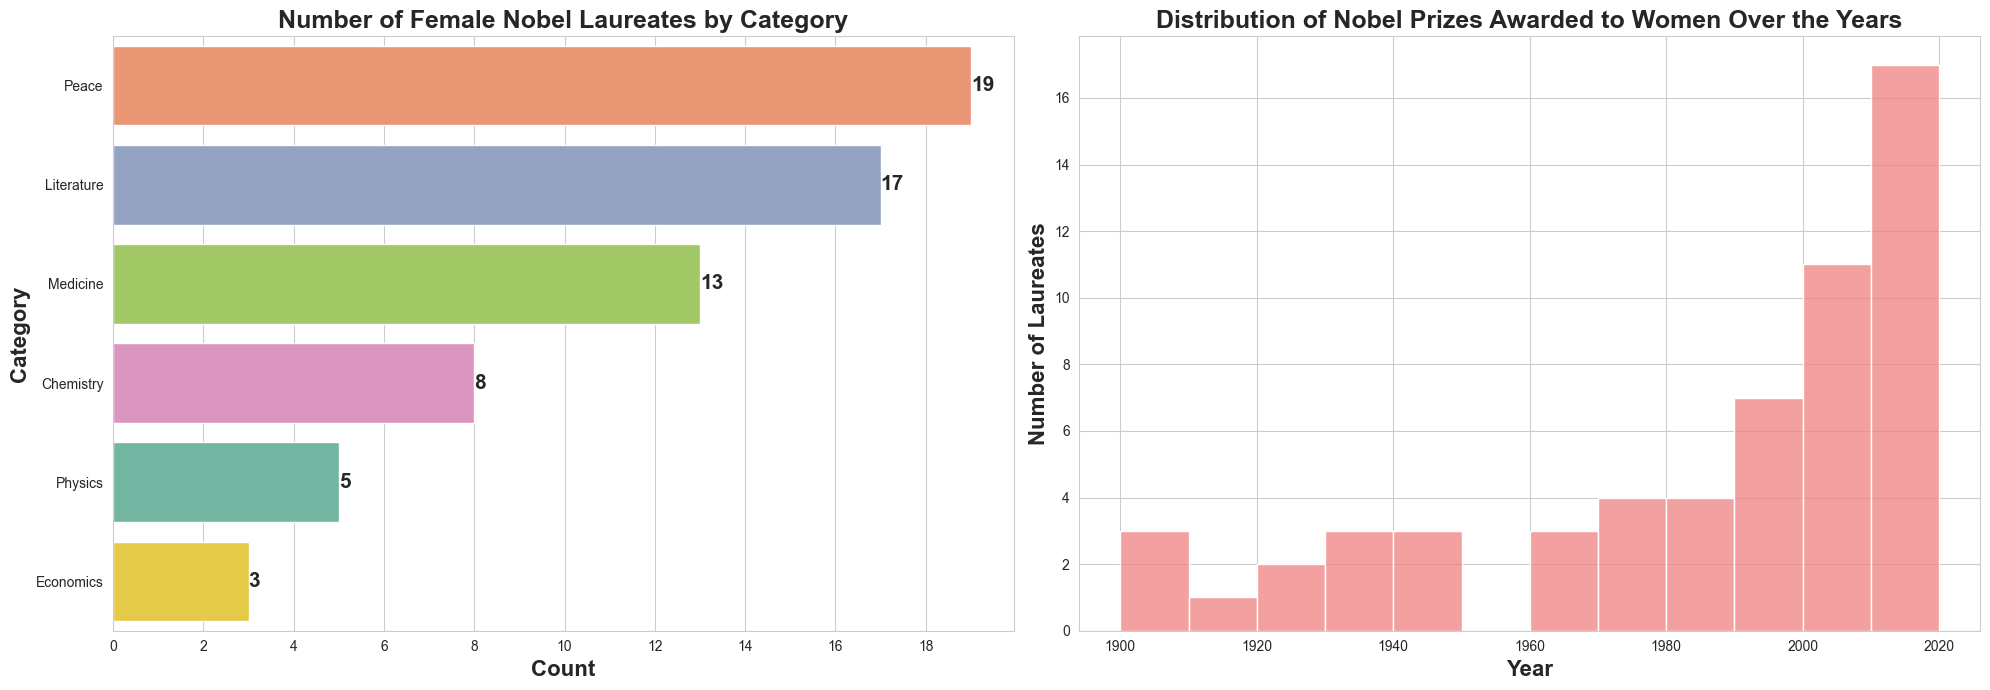

Highest-winning category for females: Peace


In [129]:
# Female Laureates Analysis (Presentation Style, Merged Subplots, High Quality)
women_winners = df[df['sex'] == 'Female']
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
# Countplot for categories
palette_female = sns.color_palette('Set2', n_colors=women_winners['category'].nunique())
ax1 = sns.countplot(y='category', data=women_winners, order=women_winners['category'].value_counts().index, palette=palette_female, hue="category", legend=False, ax=axes[0])
axes[0].set_title('Number of Female Nobel Laureates by Category', fontsize=18, fontweight='bold')
axes[0].xaxis.set_major_locator(mticker.MultipleLocator(2))
axes[0].set_xlabel('Count', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Category', fontsize=16, fontweight='bold')
for container in ax1.containers:
    ax1.bar_label(container, fontsize=15, fontweight='bold')
# Histogram for years
sns.histplot(women_winners['year'], bins=range(1900, 2030, 10), color='lightcoral', ax=axes[1])
axes[1].set_title('Distribution of Nobel Prizes Awarded to Women Over the Years', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Number of Laureates', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('plots/female_laureates_analysis.png', bbox_inches='tight', dpi=300)
plt.show()

# Save the highest-winning category for females in a variable and print it
highest_female_category = women_winners['category'].value_counts().idxmax()
print('Highest-winning category for females:', highest_female_category)

## 5. Repeat Nobel Prize Winners
---

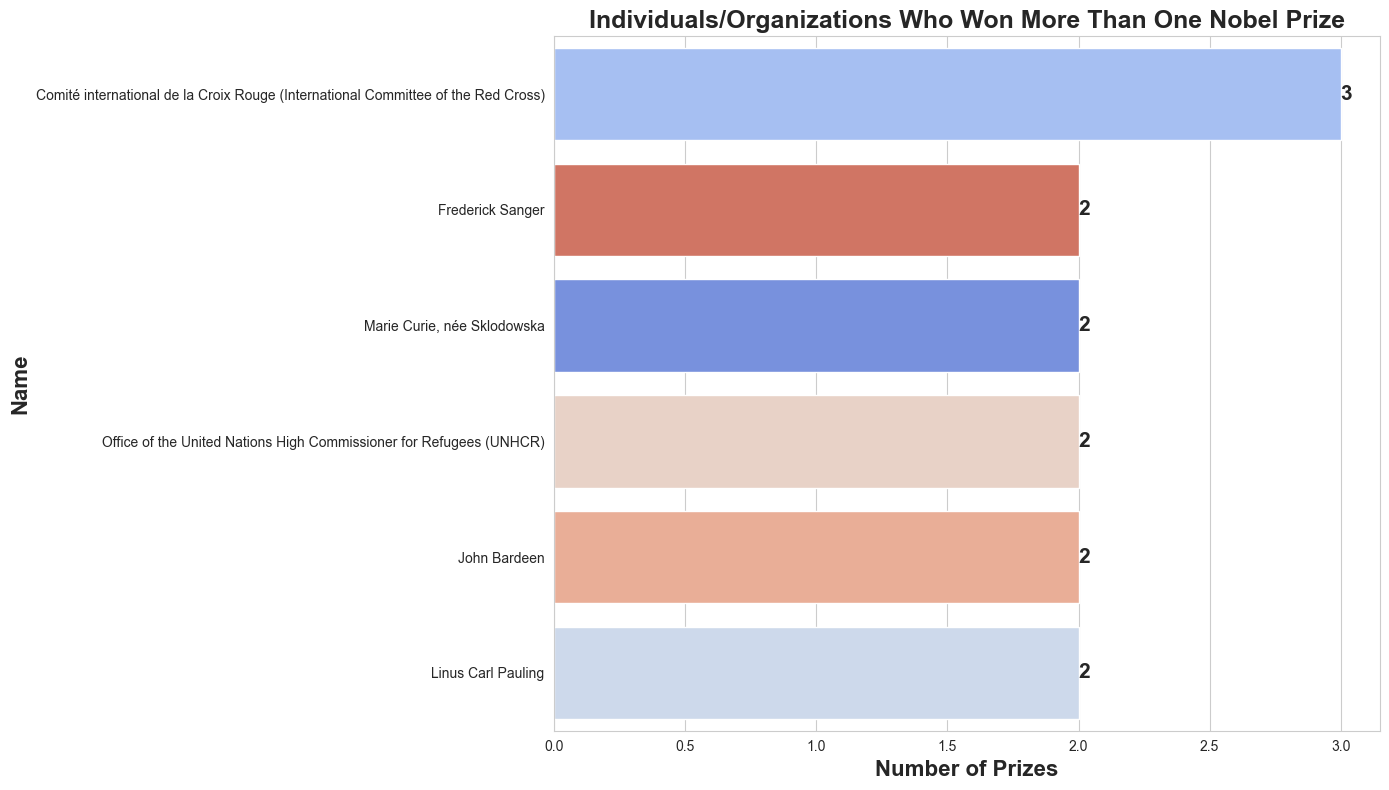

In [128]:
# Repeat Nobel Prize Winners Analysis (Presentation Style, High Quality)
multiple_time_winners = df['full_name'].value_counts()
multiple_time_winners = multiple_time_winners[multiple_time_winners > 1]
# Filter the DataFrame for those who won more than once
df_multiple = df[df['full_name'].isin(multiple_time_winners.index)]
plt.figure(figsize=(14, 8))
palette_repeat = sns.color_palette('coolwarm', n_colors=len(multiple_time_winners))
ax2 = sns.countplot(y="full_name", data=df_multiple, order=multiple_time_winners.index, palette=palette_repeat, hue="full_name", legend=False)
plt.title('Individuals/Organizations Who Won More Than One Nobel Prize', fontsize=18, fontweight='bold')
plt.xlabel('Number of Prizes', fontsize=16, fontweight='bold')
plt.ylabel('Name', fontsize=16, fontweight='bold')
for container in ax2.containers:
    ax2.bar_label(container, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('plots/repeat_winners_analysis.png', bbox_inches='tight', dpi=300)
plt.show()

# Summary of Key Findings
---
- The most commonly awarded gender and birth country are visualized, showing clear trends in Nobel Prize history.
- US-born laureates have seen significant growth in certain decades.
- Female laureates are most represented in specific categories and periods, with the first female winner identified.
- Several individuals and organizations have won multiple Nobel Prizes, as shown in the repeat winners analysis.

This notebook provides a comprehensive overview of Nobel Prize data, highlighting important patterns and insights.